In [32]:
import networkx as nx
from matplotlib import pyplot as plt

In [33]:
# g=nx.Graph()#创建空的无向图from matplotlib import pyplot as pltfrom matplotlib import pyplot as plt
g = nx.DiGraph()  #创建空的有向图

In [34]:
# 添加顶点
g.add_node('a')
g.add_nodes_from(['b', 'c', 'd'])
g.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [35]:
g.add_node('e', name='n1', weight=1)
g.add_node('f', name='n2', weight=1.2)


In [36]:
g._node

{'a': {},
 'b': {},
 'c': {},
 'd': {},
 'e': {'name': 'n1', 'weight': 1},
 'f': {'name': 'n2', 'weight': 1.2}}

In [37]:
g.nodes['e']

{'name': 'n1', 'weight': 1}

In [38]:
list(g.nodes(data=True))

[('a', {}),
 ('b', {}),
 ('c', {}),
 ('d', {}),
 ('e', {'name': 'n1', 'weight': 1}),
 ('f', {'name': 'n2', 'weight': 1.2})]

In [39]:
g.remove_node('a')
g.remove_nodes_from(['b'])
list(g.nodes(data=True))

[('c', {}),
 ('d', {}),
 ('e', {'name': 'n1', 'weight': 1}),
 ('f', {'name': 'n2', 'weight': 1.2})]

In [40]:
g._node['d'].update({'name': 'n0'})
g._node['d']['weight'] = 0.8
g._node

{'c': {},
 'd': {'name': 'n0', 'weight': 0.8},
 'e': {'name': 'n1', 'weight': 1},
 'f': {'name': 'n2', 'weight': 1.2}}

In [41]:
del g.nodes['d']['weight']
g._node

{'c': {},
 'd': {'name': 'n0'},
 'e': {'name': 'n1', 'weight': 1},
 'f': {'name': 'n2', 'weight': 1.2}}

In [42]:
g.has_node('d')

True

In [43]:
g.add_edge('d', 'e')
g.add_edges_from([('d', 'f'), ('e', 'f')])

In [44]:
g.add_edge('e', 'f', weight=4.7, relationship='renew')
g.add_weighted_edges_from([('c', 'd', 2.2), ('e', 'c', 5)])

In [45]:
g.add_edges_from([('c', 'f', {'weight': 4.8})])
g.edges(data=True)

OutEdgeDataView([('c', 'd', {'weight': 2.2}), ('c', 'f', {'weight': 4.8}), ('d', 'e', {}), ('d', 'f', {}), ('e', 'f', {'weight': 4.7, 'relationship': 'renew'}), ('e', 'c', {'weight': 5})])

In [46]:
print(g['e']['f'])
g.get_edge_data('e', 'f')

{'weight': 4.7, 'relationship': 'renew'}


{'weight': 4.7, 'relationship': 'renew'}

In [47]:
g.remove_edge('d', 'e')
g.remove_edges_from([('d', 'f'), ('c', 'd')])

In [48]:
print(g.adj['c']['f'])
g.adj['e']

{'weight': 4.8}


AtlasView({'f': {'weight': 4.7, 'relationship': 'renew'}, 'c': {'weight': 5}})

In [49]:
# 对于无向图，顶点的度是指跟顶点相连的边的数量；对于有向图，顶点的图分为入度和出度，朝向顶点的边称作入度；背向顶点的边称作出度。
g.degree()

DiDegreeView({'c': 2, 'd': 0, 'e': 2, 'f': 2})

In [50]:
del g

g = nx.Graph()  #创建空的有向图
nodes = [{'id': 'A', 'name': 'A'}, {'id': 'B', 'name': 'B'},
         {'id': 'C', 'name': 'C'}, {'id': 'D', 'name': 'D'},
         {'id': 'E', 'name': 'E'}, {'id': 'F', 'name': 'F'},
         {'id': 'G', 'name': 'G'}]
for i in nodes:
    g.add_node(i['id'], name=i['name'])

g.add_edges_from([('D', 'C', {'weight': 3}),
                  ('D', 'E', {'weight': 4}),
                  ('C', 'E', {'weight': 5}),
                  ('C', 'F', {'weight': 6}),
                  ('E', 'F', {'weight': 2}),
                  ('G', 'E', {'weight': 8}),
                  ('B', 'C', {'weight': 10}),
                  ('B', 'F', {'weight': 7}),
                  ('F', 'G', {'weight': 9}),
                  ('A', 'F', {'weight': 16}),
                  ('A', 'G', {'weight': 14}),
                  ('A', 'B', {'weight': 12})])

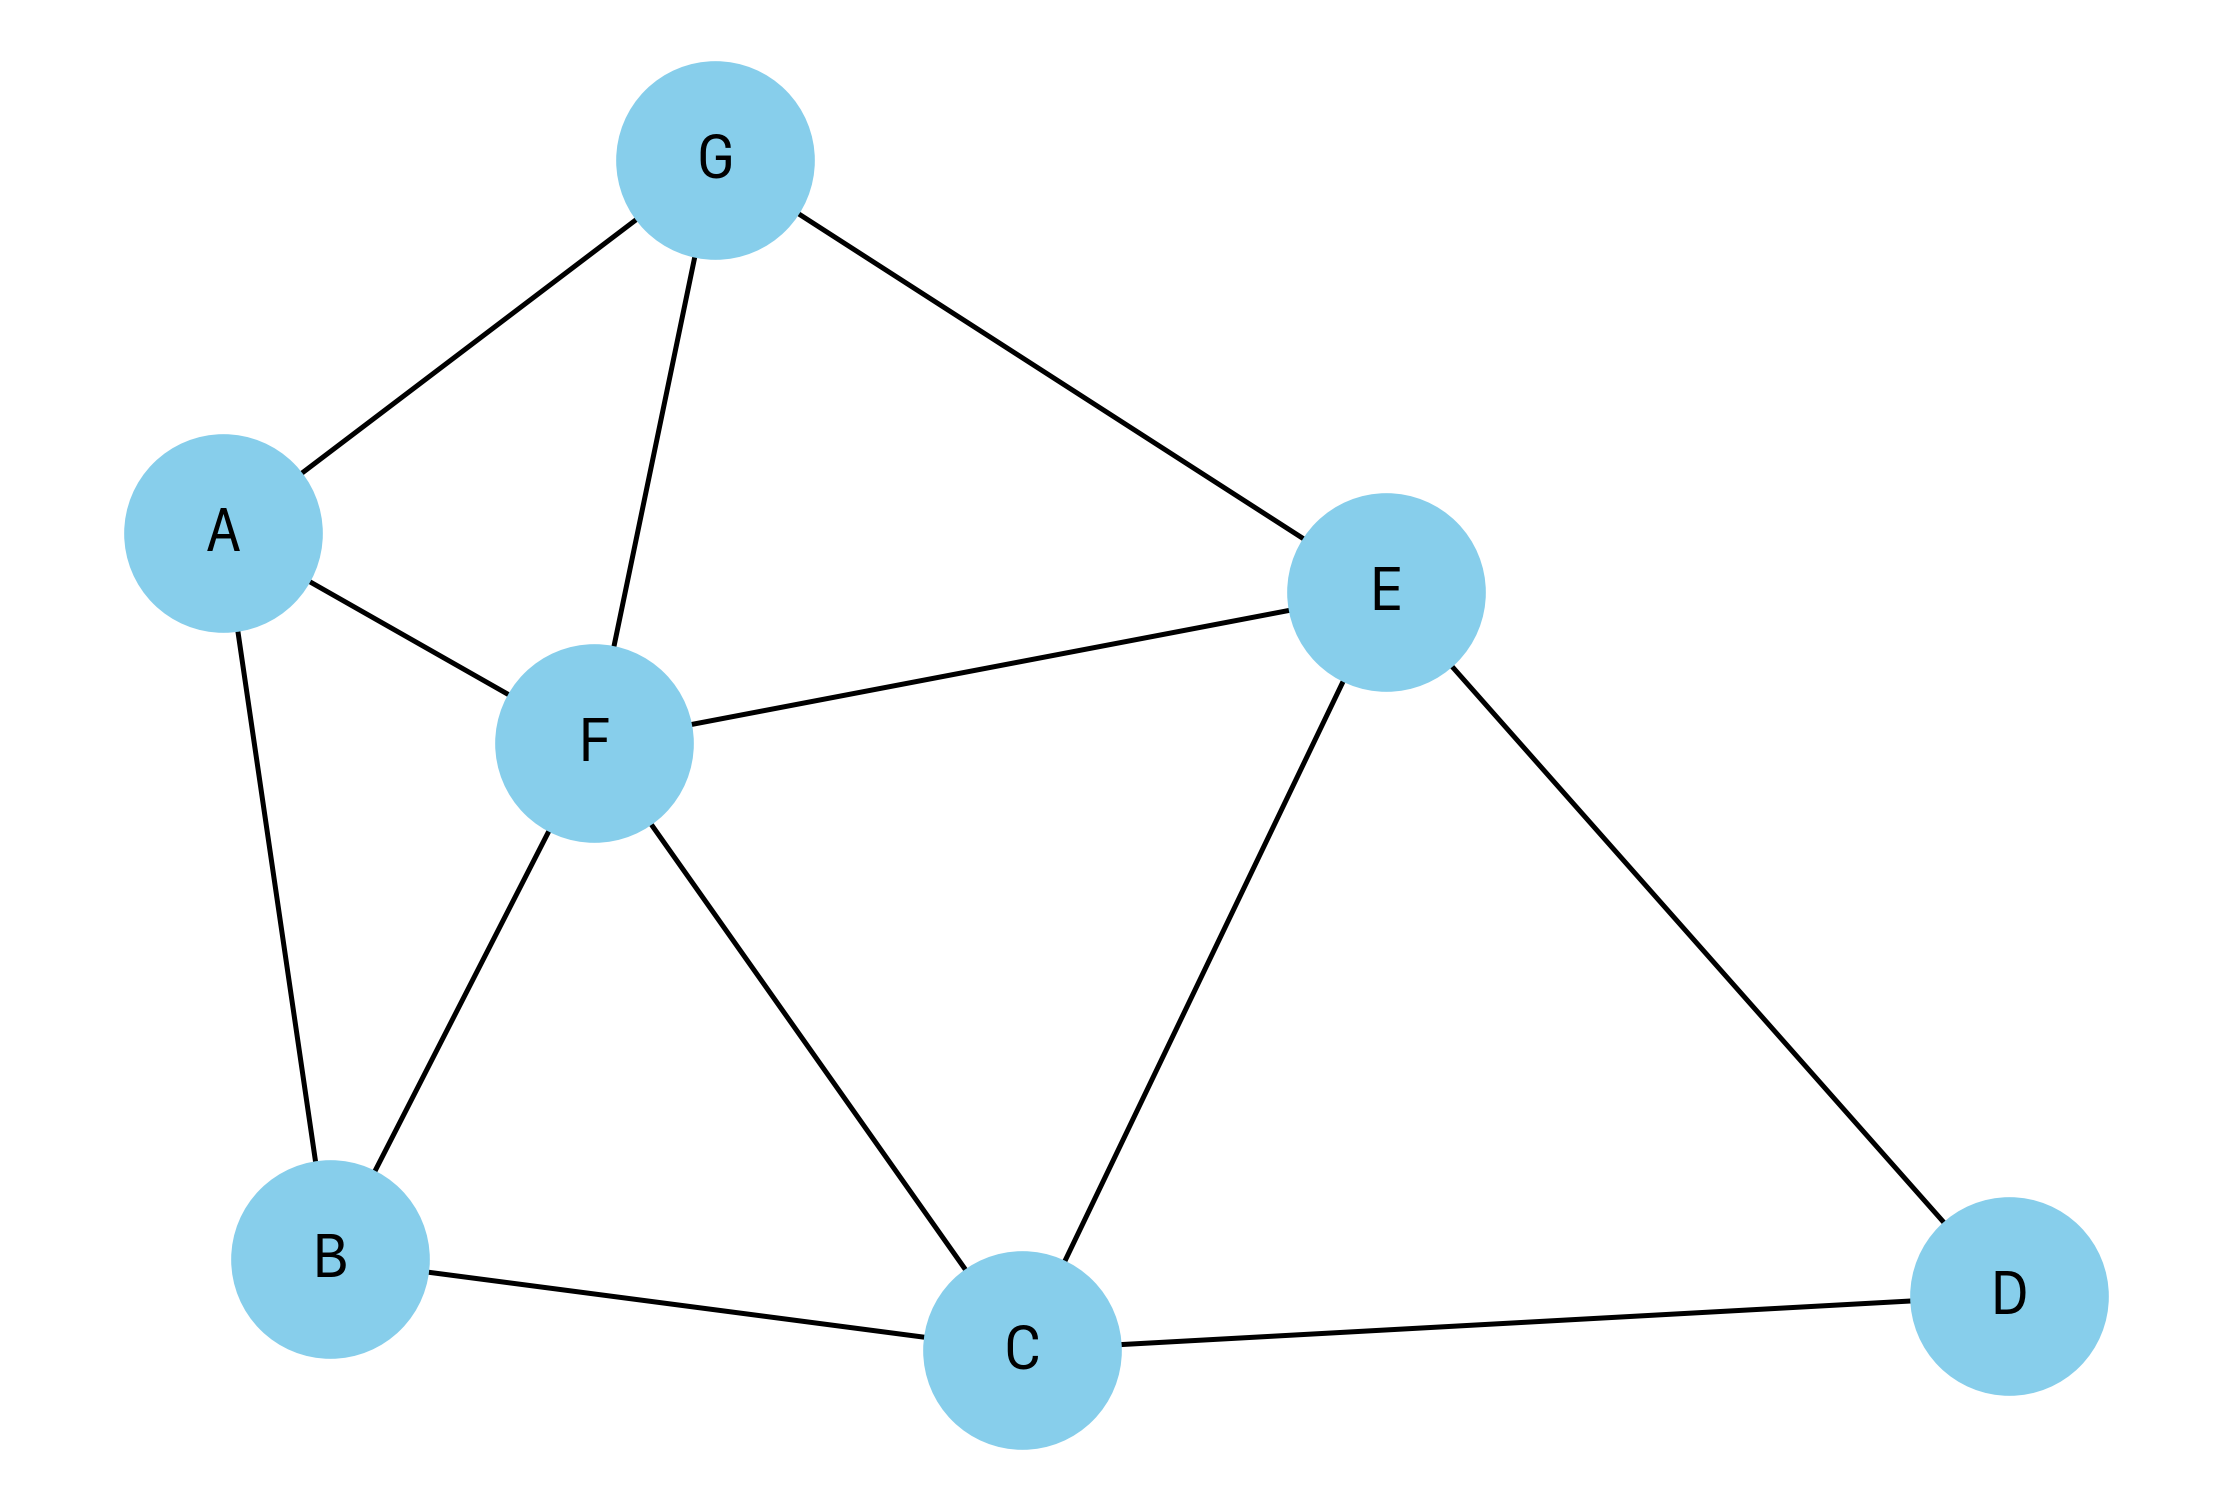

In [51]:
nx.draw(g, with_labels=True, node_size=1500, node_color="skyblue", pos=nx.fruchterman_reingold_layout(g))

In [52]:
def draw_weight_graph(g, node_attributes, edge_attributes):
    pos = nx.spring_layout(g)
    nx.draw(g, pos)
    node_labels = nx.get_node_attributes(g, node_attributes)
    nx.draw_networkx_labels(g, pos, labels=node_labels)
    edge_labels = nx.get_edge_attributes(g, edge_attributes)
    nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)
    plt.show()

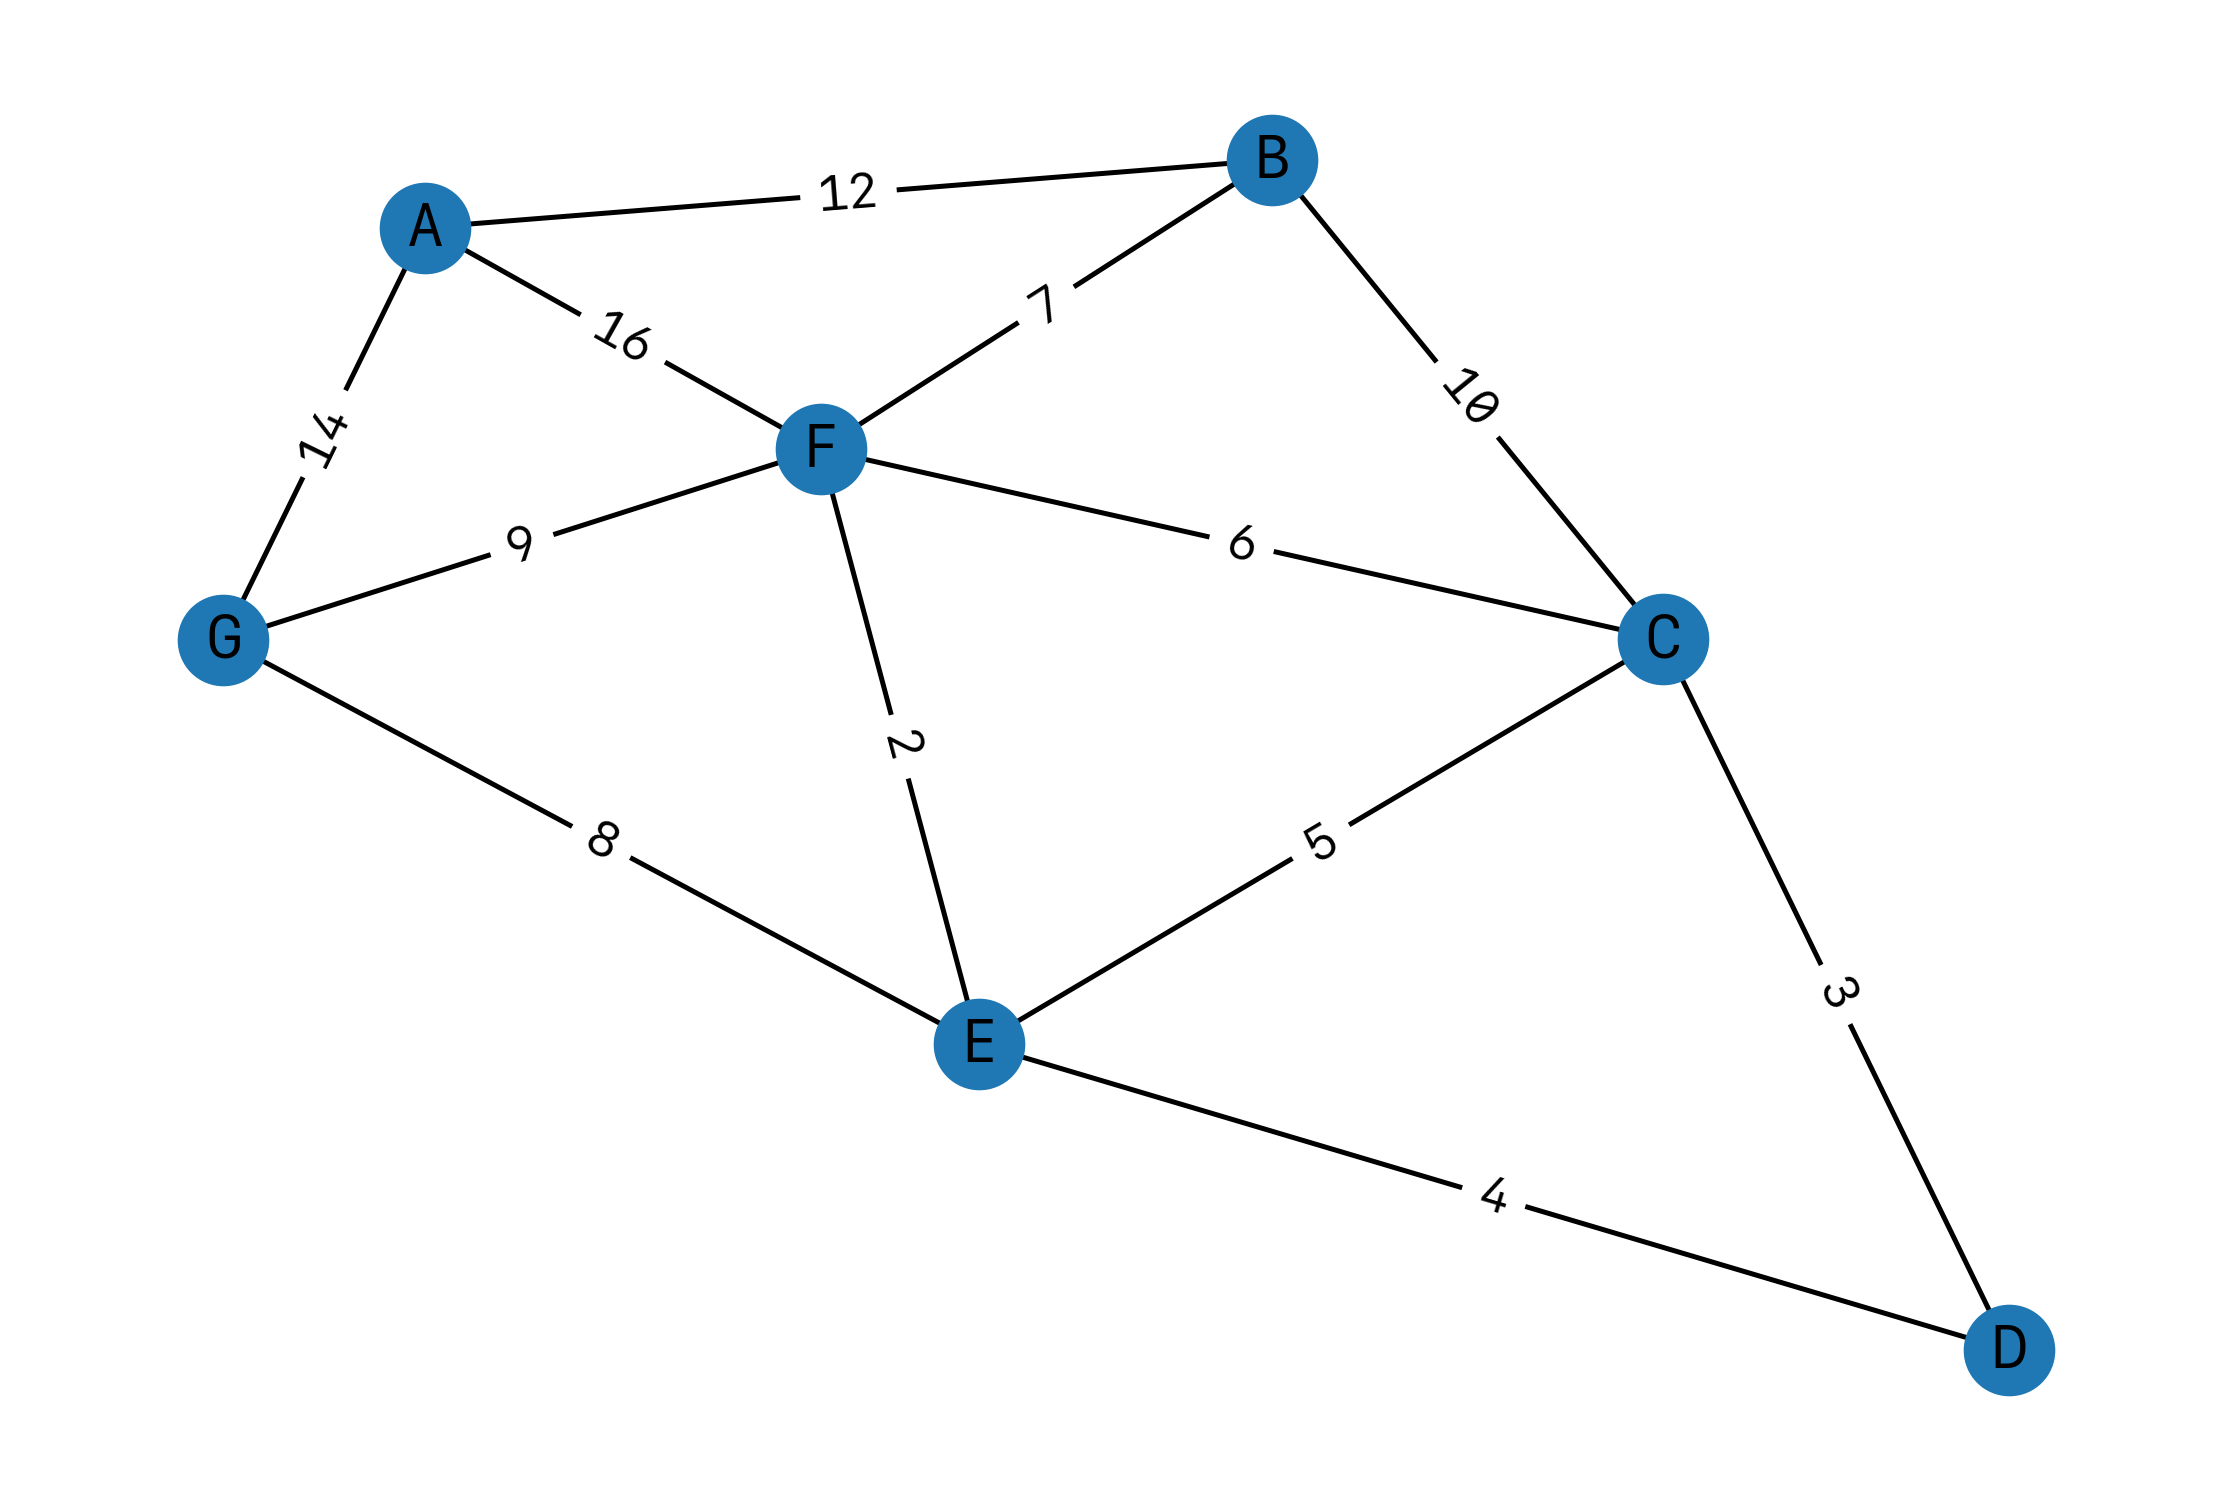

In [53]:
plt.rcParams['font.sans-serif'] = ['SF Mono']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['savefig.dpi'] = 360  #图片像素
plt.rcParams['figure.dpi'] = 360  #分辨率
draw_weight_graph(g, 'name', 'weight')

In [54]:
n = 'D'
print(g.adj[n])

{'C': {'weight': 3}, 'E': {'weight': 4}}


In [55]:
# 遍历
print(list(nx.bfs_tree(g, 'D')))
print(list(nx.dfs_tree(g, 'D')))

# #以5为顶点,深度遍历,限定深度为3
# T = nx.dfs_tree(G, source=5, depth_limit=3)

['D', 'C', 'E', 'F', 'B', 'G', 'A']
['D', 'C', 'E', 'F', 'B', 'A', 'G']


In [56]:
# 计算每个顶点的PageRank值
# 每个顶点的PageRank（简称PR）值，是访问顶点的概率，可以通过networkx.pagerank()函数来计算
# 该函数根据顶点的入边和边的权重来计算顶点的PR值，也就是说，PR值跟顶点的入边有关，跟入边的weight（权重）属性有关


In [57]:
nx.pagerank(g, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

# g：无向图会被转换为有向图，一条无向边转换为两条有向边；
# alpha：阻尼参数，默认值是0.85，取值范围为 0 到 1, 代表从图中某一特定点指向其他任意点的概率；
# weight：默认值是weight，表示使用edge的weight属性作为权重，如果没有指定，那么把edge的权重设置为1；

{'A': 0.1982773232771344,
 'B': 0.14618368426431727,
 'C': 0.13518979582047555,
 'D': 0.056394545760529546,
 'E': 0.11512816666716814,
 'F': 0.1930870506342043,
 'G': 0.15573943357617068}

In [58]:
# 例如，创建一个有向图，由三个顶点（A、B和C），两条边（A指向B，A指向C），边的权重都是0.5
g1 =nx.DiGraph()
g1.add_weighted_edges_from([('A','B',0.5),('A','C',0.5)])
print( nx.pagerank(g1))
#{'A': 0.259740259292235, 'C': 0.3701298703538825, 'B': 0.3701298703538825}

g1['A']['C']['weight']=1
print( nx.pagerank(g1))
# {'A': 0.259740259292235, 'C': 0.40692640737443164, 'B': 0.3333333333333333}

{'A': 0.25974050510584634, 'B': 0.37012974744707666, 'C': 0.37012974744707666}
{'A': 0.25974050510584634, 'B': 0.3333333333333332, 'C': 0.40692616156082007}


In [59]:
# 所有简单路径
for path in nx.all_simple_paths(g, source='D', target='A'):
    print(path)

['D', 'C', 'E', 'F', 'B', 'A']
['D', 'C', 'E', 'F', 'G', 'A']
['D', 'C', 'E', 'F', 'A']
['D', 'C', 'E', 'G', 'F', 'B', 'A']
['D', 'C', 'E', 'G', 'F', 'A']
['D', 'C', 'E', 'G', 'A']
['D', 'C', 'F', 'E', 'G', 'A']
['D', 'C', 'F', 'B', 'A']
['D', 'C', 'F', 'G', 'A']
['D', 'C', 'F', 'A']
['D', 'C', 'B', 'F', 'E', 'G', 'A']
['D', 'C', 'B', 'F', 'G', 'A']
['D', 'C', 'B', 'F', 'A']
['D', 'C', 'B', 'A']
['D', 'E', 'C', 'F', 'B', 'A']
['D', 'E', 'C', 'F', 'G', 'A']
['D', 'E', 'C', 'F', 'A']
['D', 'E', 'C', 'B', 'F', 'G', 'A']
['D', 'E', 'C', 'B', 'F', 'A']
['D', 'E', 'C', 'B', 'A']
['D', 'E', 'F', 'C', 'B', 'A']
['D', 'E', 'F', 'B', 'A']
['D', 'E', 'F', 'G', 'A']
['D', 'E', 'F', 'A']
['D', 'E', 'G', 'F', 'C', 'B', 'A']
['D', 'E', 'G', 'F', 'B', 'A']
['D', 'E', 'G', 'F', 'A']
['D', 'E', 'G', 'A']


In [60]:
nx.algorithms.degree_centrality(g)
#100条记录3机场
nx.density(g)
# 图的平均边密度 0.09047619047619047
nx.average_shortest_path_length(g)
#图中所有路径的平均最短路径长度2.36984126984127
nx.average_degree_connectivity(g)
#对于一个度为k的节点-它的邻居度的平均值是多少?

{3: 3.888888888888889, 4: 3.5, 2: 4.0, 5: 3.4}

In [61]:
dijpath = nx.dijkstra_path(g, source='D', target='A')
dijpath

['D', 'E', 'F', 'A']

In [62]:
shortpath = nx.dijkstra_path(g, source='D', target='A', weight='weight')
shortpath

['D', 'E', 'F', 'A']